# Import Data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [26]:
df = pd.read_csv("bank-full.csv")

In [27]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Data  Exploration

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [29]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [30]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [31]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [33]:
# Shape of our dataset
df.shape

(45211, 17)

In [34]:
# Info our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [35]:
# Describe our dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [36]:
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
# Check if the data set contains any null values - Nothing found!
df[df.isnull().any(axis=1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [38]:
#find percentage of missing values for each column
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

In [41]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [42]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [43]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [44]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [45]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [46]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [64]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [65]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [66]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [67]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<AxesSubplot:title={'center':'job value counts'}>

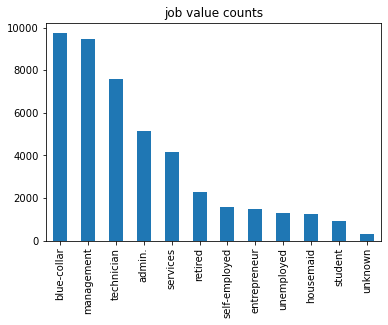

In [50]:
value_counts = df['job'].value_counts()

value_counts.plot.bar(title = 'job value counts')

<AxesSubplot:title={'center':'Marital value counts'}>

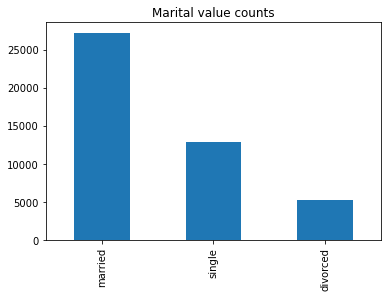

In [54]:
value_counts = df['marital'].value_counts()

value_counts.plot.bar(title = 'Marital value counts')

<AxesSubplot:title={'center':'education value counts'}>

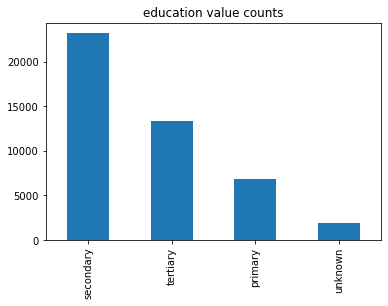

In [55]:
value_counts = df['education'].value_counts()

value_counts.plot.bar(title = 'education value counts')

<AxesSubplot:title={'center':'contact value counts'}>

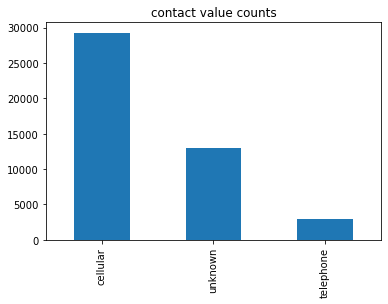

In [61]:
value_counts = df['contact'].value_counts()

value_counts.plot.bar(title = 'contact value counts')

<AxesSubplot:title={'center':'month value counts'}>

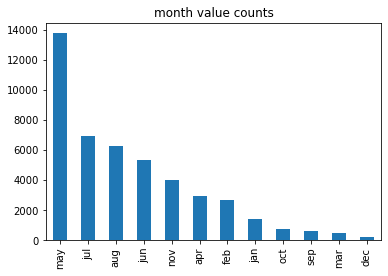

In [56]:
value_counts = df['month'].value_counts()

value_counts.plot.bar(title = 'month value counts')

<AxesSubplot:title={'center':'poutcome value counts'}>

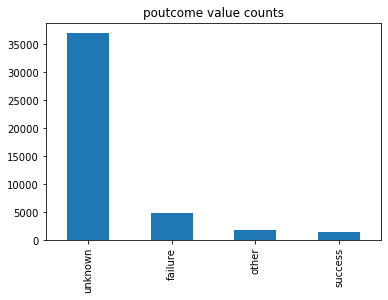

In [57]:
value_counts = df['poutcome'].value_counts()

value_counts.plot.bar(title = 'poutcome value counts')

<AxesSubplot:title={'center':'Default value counts'}>

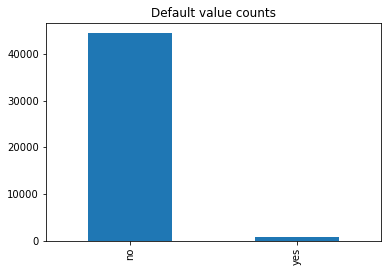

In [58]:
value_counts = df['default'].value_counts()

value_counts.plot.bar(title = 'Default value counts')

<AxesSubplot:title={'center':'Housing value counts'}>

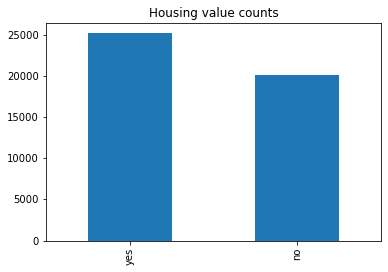

In [59]:
value_counts = df['housing'].value_counts()

value_counts.plot.bar(title = 'Housing value counts')

<AxesSubplot:title={'center':'Loan value counts'}>

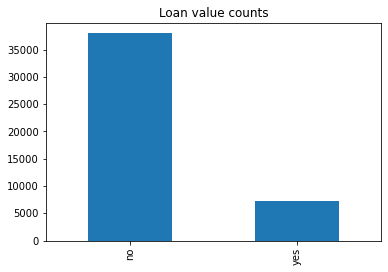

In [60]:
value_counts = df['loan'].value_counts()

value_counts.plot.bar(title = 'Loan value counts')

<AxesSubplot:title={'center':'y value counts'}>

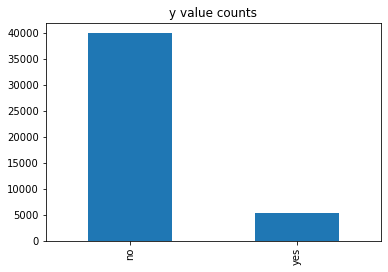

In [63]:
value_counts = df['y'].value_counts()

value_counts.plot.bar(title = 'y value counts')

<AxesSubplot:title={'center':'Job and y'}>

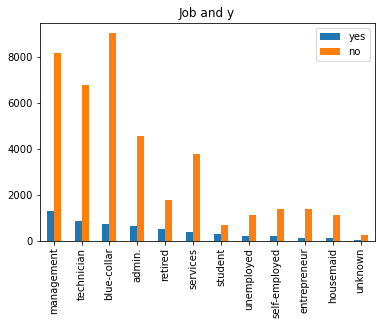

In [72]:
#job and deposit
df1 = pd.DataFrame()

df1['yes'] = df[df['y'] == 'yes']['job'].value_counts()
df1['no'] = df[df['y'] == 'no']['job'].value_counts()

df1.plot.bar(title = 'Job and y')

<AxesSubplot:title={'center':'Marital status and y'}>

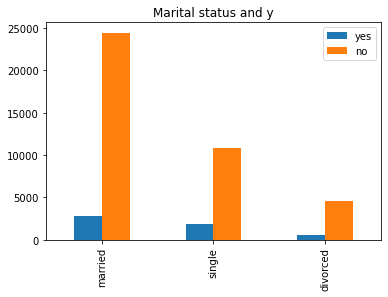

In [73]:
#marital status and y
df1 = pd.DataFrame()

df1['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
df1['no'] = df[df['y'] == 'no']['marital'].value_counts()

df1.plot.bar(title = 'Marital status and y')

<AxesSubplot:title={'center':'Education and y'}>

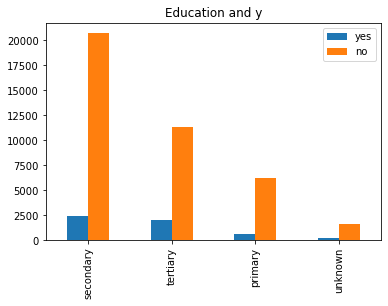

In [75]:
#Education and y
df1 = pd.DataFrame()

df1['yes'] = df[df['y'] == 'yes']['education'].value_counts()
df1['no'] = df[df['y'] == 'no']['education'].value_counts()

df1.plot.bar(title = 'Education and y')

<AxesSubplot:title={'center':'Type of contact and y'}>

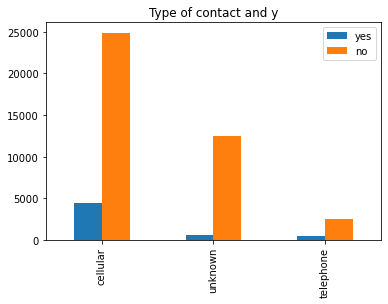

In [76]:
#Type of contact and y
df1 = pd.DataFrame()

df1['yes'] = df[df['y'] == 'yes']['contact'].value_counts()
df1['no'] = df[df['y'] == 'no']['contact'].value_counts()

df1.plot.bar(title = 'Type of contact and y')

In [78]:
#balance and y statistics

df2 = pd.DataFrame()
df2['balance_yes'] = (df[df['y'] == 'yes'][['y','balance']].describe())['balance']
df2['balance_no'] = (df[df['y'] == 'no'][['y','balance']].describe())['balance']

df2

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


<AxesSubplot:title={'center':'Balance and y statistics'}>

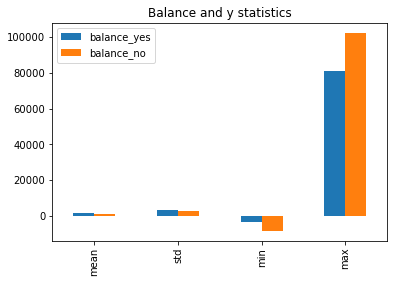

In [80]:
df2.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and y statistics')

In [81]:
#age and y statistics

df2 = pd.DataFrame()
df2['age_yes'] = (df[df['y'] == 'yes'][['y','age']].describe())['age']
df2['age_no'] = (df[df['y'] == 'no'][['y','age']].describe())['age']

df2

,age_yes,age_no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


<AxesSubplot:title={'center':'Age and y statistics'}>

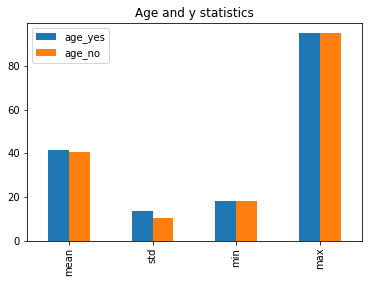

In [82]:
df2.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and y statistics')

In [83]:
#number of contacts performed during this campaign ('campaign') and y
df2 = pd.DataFrame()
df2['campaign_yes'] = (df[df['y'] == 'yes'][['y','campaign']].describe())['campaign']
df2['campaign_no'] = (df[df['y'] == 'no'][['y','campaign']].describe())['campaign']

df2

,campaign_yes,campaign_no
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<AxesSubplot:title={'center':'Number of contacts performed during this campaign and y statistics'}>

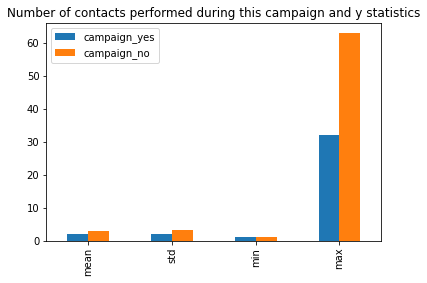

In [84]:
df2.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and y statistics')

In [85]:
#number of contacts performed during previous campaign ('previous') and deposit
df2 = pd.DataFrame()
df2['previous_yes'] = (df[df['y'] == 'yes'][['y','previous']].describe())['previous']
df2['previous_no'] = (df[df['y'] == 'no'][['y','previous']].describe())['previous']

df2

,previous_yes,previous_no
count,5289.000000,39922.000000
mean,1.170354,0.502154
std,2.553272,2.256771
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,58.000000,275.000000


<AxesSubplot:title={'center':'Number of contacts performed during previous campaign and y statistics'}>

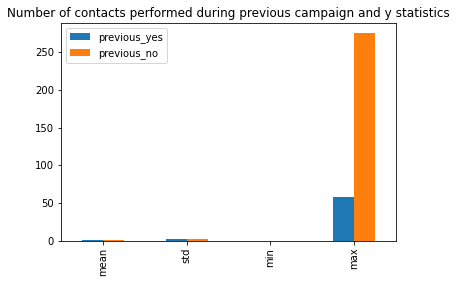

In [86]:
df2.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and y statistics')

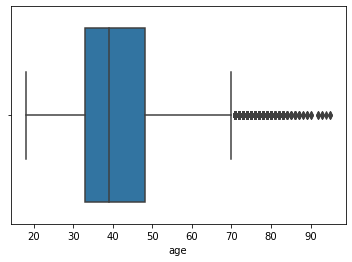

In [88]:
# Boxplot for 'age'
g = sns.boxplot(x=df["age"])

C:\Users\pasun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

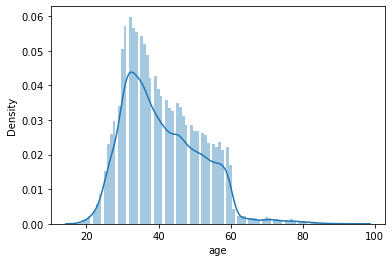

In [89]:
# Distribution of Age
sns.distplot(df.age, bins=100)

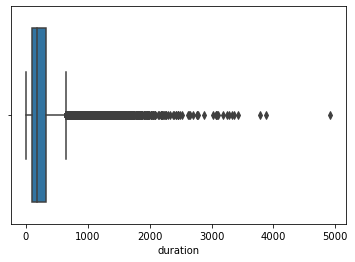

In [91]:
# Boxplot for 'duration'
g = sns.boxplot(x=df["duration"])

C:\Users\pasun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

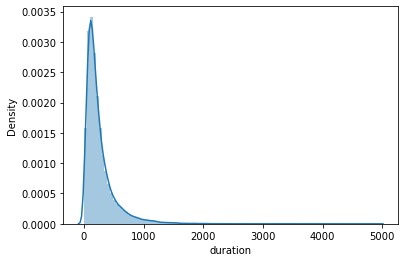

In [92]:
sns.distplot(df.duration, bins=100)

# Data Cleaning

In [122]:
df4=df.dropna()

In [123]:
df4.rename(columns = {'y':'deposit'}, inplace = True)
df4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [124]:
df4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [125]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


# Convert categorical data

In [126]:
# Make a copy for parsing
bank_data = df4.copy()

#### ------------------------------ job ------------------------------

In [128]:
# Explore People who made a deposit Vs Job category
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job ==j)])))

management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [129]:
# Different types of job categories and their counts
bank_data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [130]:
# Combine similar jobs into categiroes
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [131]:
# New value counts
bank_data.job.value_counts()

white-collar     14629
blue-collar       9732
technician        7597
pink-collar       5394
other             4793
self-employed     1579
entrepreneur      1487
Name: job, dtype: int64

#### ------------------------------ poutcome ------------------------------

In [109]:
bank_data.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [132]:
# Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')
bank_data.poutcome.value_counts()

unknown    38799
failure     4901
success     1511
Name: poutcome, dtype: int64

------------------------------ contact ------------------------------


In [133]:
# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)

------------------------------ default ------------------------------

In [134]:
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)

#### ------------------------------ housing ------------------------------

In [135]:
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)

#### ------------------------------ loan ------------------------------

In [136]:
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)

#### ------------------------------ month, day ------------------------------

In [137]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

#### ------------------------------ deposit ------------------------------

In [138]:
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

#### ------------------------------ pdays ------------------------------ 

In [139]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
#       -1 means client was not previously contacted

print("Customers that have not been contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on padys    :", bank_data['pdays'].max())

Customers that have not been contacted before: 36954
Maximum values on padys    : 871


In [140]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000

In [141]:
# Create a new column: recent_pdays 
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)

# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [142]:
bank_data.tail()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
45206,51,technician,married,tertiary,825,977,3,0,unknown,0,0,0,1,0.000100
45207,71,other,divorced,primary,1729,456,2,0,unknown,0,0,0,1,0.000100
45208,72,other,married,secondary,5715,1127,5,3,success,0,0,0,1,0.005435
45209,57,blue-collar,married,secondary,668,508,4,0,unknown,0,0,0,0,0.000100
45210,37,entrepreneur,married,secondary,2971,361,2,11,unknown,0,0,0,0,0.005319


### ------------------------------ Convert to dummy values ------------------------------

In [144]:
# Convert categorical variables to dummies
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
bank_with_dummies.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,58,2143,261,1,0,0,1,0,0,0.0001,...,0,1,0,0,0,1,0,0,0,1
1,44,29,151,1,0,0,1,0,0,0.0001,...,0,0,1,0,1,0,0,0,0,1
2,33,2,76,1,0,0,1,1,0,0.0001,...,0,1,0,0,1,0,0,0,0,1
3,47,1506,92,1,0,0,1,0,0,0.0001,...,0,1,0,0,0,0,1,0,0,1
4,33,1,198,1,0,0,0,0,0,0.0001,...,0,0,1,0,0,0,1,0,0,1


In [145]:
bank_with_dummies.shape

(45211, 27)

In [146]:
bank_with_dummies.describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,0.580323,0.018027,0.555838,0.160226,0.116985,0.002166,...,0.115171,0.601933,0.282896,0.151534,0.513194,0.294198,0.041074,0.108403,0.033421,0.858176
std,10.618762,3044.765829,257.527812,3.098021,2.303441,0.133049,0.496878,0.366820,0.321406,0.024128,...,0.319232,0.489505,0.450411,0.358572,0.499831,0.455687,0.198464,0.310892,0.179735,0.348873
min,18.000000,-8019.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,448.000000,180.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000100,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1428.000000,319.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000100,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,4918.000000,63.000000,275.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Observations on whole population

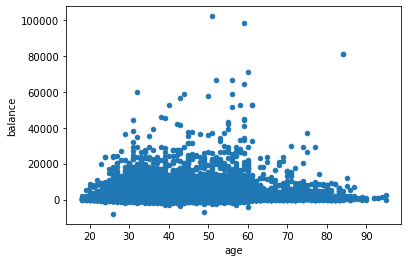

In [147]:
# Scatterplot showing age and balance
bank_with_dummies.plot(kind='scatter', x='age', y='balance');

# Across all ages, majority of people have savings of less than 20000.

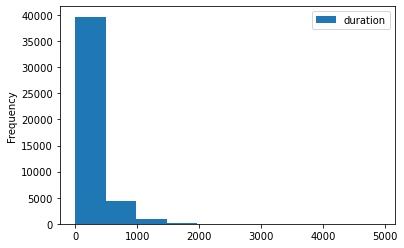

In [148]:
bank_with_dummies.plot(kind='hist', x='poutcome_success', y='duration');

#### Analysis on people who sign up for a term deposit

In [149]:
# People who sign up to a term deposite
bank_with_dummies[bank_data.deposit_cat == 1].describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
# People signed up to a term deposite having a personal loan (loan_cat) and housing loan (housing_cat)
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.loan_cat) & (bank_with_dummies.housing_cat)])

265

In [151]:
# People signed up to a term deposite with a credit default 
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.default_cat ==1)])

52

<AxesSubplot:xlabel='job', ylabel='deposit_cat'>

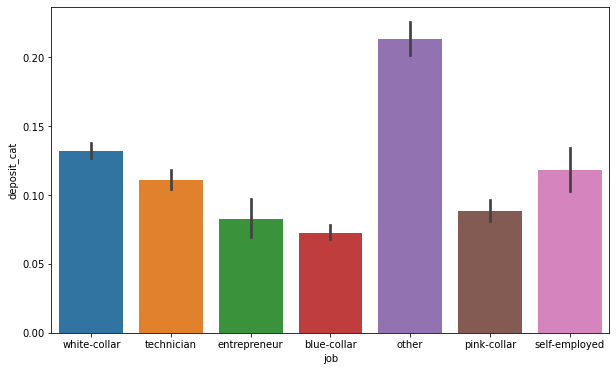

In [152]:
# Bar chart of job Vs deposite
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit_cat', data = bank_data)

<AxesSubplot:xlabel='poutcome', ylabel='duration'>

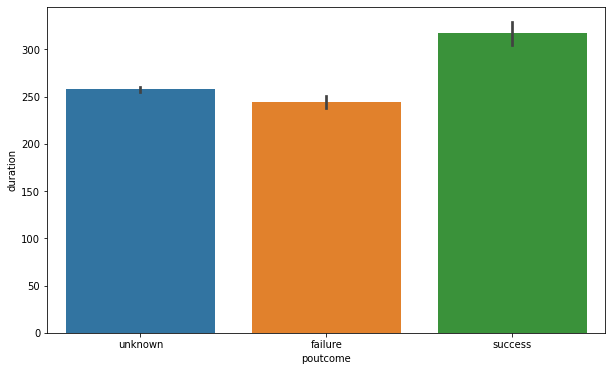

In [153]:
# Bar chart of "previous outcome" Vs "call duration"

plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = bank_data)

 ## Classification

In [154]:
# make a copy
bankcl = bank_with_dummies

In [155]:
# The Correltion matrix
corr = bankcl.corr()
corr

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.097783,-0.004648,0.004760,0.001288,-0.017879,-0.185513,-0.015655,0.025155,0.012884,...,0.164674,0.286257,-0.427817,0.196182,-0.093979,-0.081629,0.069665,-0.004927,0.035526,-0.013912
balance,0.097783,1.000000,0.021560,-0.014578,0.016674,-0.066745,-0.068768,-0.084350,0.052838,-0.003702,...,-0.021732,0.025708,-0.012537,-0.015451,-0.069937,0.084001,0.011181,0.011857,0.035240,-0.028721
duration,-0.004648,0.021560,1.000000,-0.084570,0.001203,-0.010021,0.005075,-0.012412,0.394521,-0.003196,...,0.006100,-0.022683,0.020328,-0.003660,0.002084,0.000891,-0.000682,-0.018925,0.042389,-0.004974
campaign,0.004760,-0.014578,-0.084570,1.000000,-0.032855,0.016822,-0.023599,0.009980,-0.073172,-0.023789,...,-0.015484,0.031371,-0.023120,0.009616,-0.020893,0.012866,0.005704,-0.088131,-0.057486,0.108153
previous,0.001288,0.016674,0.001203,-0.032855,1.000000,-0.018329,0.037076,-0.011043,0.093236,0.099094,...,-0.004534,-0.012691,0.017006,-0.016705,-0.005603,0.022888,-0.008257,0.350627,0.201424,-0.416226
default_cat,-0.017879,-0.066745,-0.010021,0.016822,-0.018329,1.000000,-0.006025,0.077234,-0.022419,-0.009932,...,0.017777,-0.014460,0.003115,0.001623,0.013220,-0.015239,-0.001236,-0.026389,-0.023344,0.035542
housing_cat,-0.185513,-0.068768,0.005075,-0.023599,0.037076,-0.006025,1.000000,0.041323,-0.139173,-0.017263,...,0.001778,0.017681,-0.020475,0.010671,0.101659,-0.099175,-0.047595,0.106795,-0.091360,-0.048101
loan_cat,-0.015655,-0.084350,-0.012412,0.009980,-0.011043,0.077234,0.041323,1.000000,-0.068185,-0.005574,...,0.016377,0.036906,-0.051716,-0.012396,0.070625,-0.045940,-0.049992,-0.002186,-0.053713,0.029620
deposit_cat,0.025155,0.052838,0.394521,-0.073172,0.093236,-0.022419,-0.139173,-0.068185,1.000000,0.031259,...,0.002772,-0.060260,0.063526,-0.040393,-0.036388,0.066448,0.012053,0.009885,0.306788,-0.166863
recent_pdays,0.012884,-0.003702,-0.003196,-0.023789,0.099094,-0.009932,-0.017263,-0.005574,0.031259,1.000000,...,-0.006304,0.003896,0.000233,-0.010473,-0.008755,0.017972,-0.000294,0.064452,0.099985,-0.108946


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

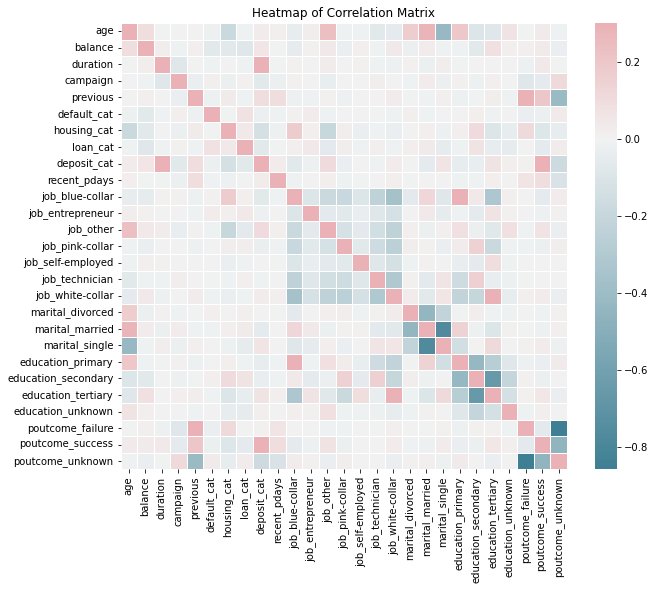

In [156]:
# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [157]:
# Extract the deposte_cat column (the dependent variable)
corr_deposite = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))
corr_deposite.sort_values(by = 'deposit_cat', ascending = False)

,deposit_cat
duration,0.394521
poutcome_success,0.306788
job_other,0.102895
previous,0.093236
education_tertiary,0.066448
marital_single,0.063526
balance,0.052838
job_white-collar,0.032454
recent_pdays,0.031259
age,0.025155


## Build the Data Model

In [158]:
# Train-Test split: 20% test data
data_drop_deposite = bankcl.drop('deposit_cat', 1)
label = bankcl.deposit_cat
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposite, label, test_size = 0.2, random_state = 50)

C:\Users\pasun\AppData\Local\Temp/ipykernel_10024/2260804783.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_drop_deposite = bankcl.drop('deposit_cat', 1)


In [159]:
# Decision tree with depth = 2
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  0.8921422251714223
Testing score:  0.8908548048214088


In [160]:
# Decision tree with depth = 3
dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt3.fit(data_train, label_train)
dt3_score_train = dt3.score(data_train, label_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(data_test, label_test)
print("Testing score: ",dt3_score_test)

Training score:  0.9000774165007742
Testing score:  0.9020236647130377


In [161]:
# Decision tree with depth = 4
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(data_train, label_train)
dt4_score_train = dt4.score(data_train, label_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(data_test, label_test)
print("Testing score: ",dt4_score_test)

Training score:  0.9009345277593452
Testing score:  0.9022448302554462


In [162]:
# Decision tree with depth = 6
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(data_train, label_train)
dt6_score_train = dt6.score(data_train, label_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(data_test, label_test)
print("Testing score: ",dt6_score_test)

Training score:  0.9040588365405884
Testing score:  0.9011390025434037


In [164]:
# Decision tree: To the full depth
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(data_test, label_test)
print("Testing score: ", dt1_score_test)

Training score:  1.0
Testing score:  0.8555789008072542


#### Compare Training and Testing scores for various tree depths used

In [165]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.8921422251714223   0.8908548048214088
3        0.9000774165007742   0.9020236647130377
4        0.9009345277593452   0.9022448302554462
6        0.9040588365405884   0.9011390025434037
max                     1.0   0.8555789008072542


It could be seen that, higher the depth, training score increases and matches perfects with the training data set. However higher the depth the tree goes, it overfit to the training data set. So it's no use keep increasing the tree depth. According to above observations, tree with a depth of 2 seems more reasonable as both training and test scores are reasonably high.

In [166]:
# Let's generate the decision tree for depth = 2
# Create a feature vector
features = bankcl.columns.tolist()

# Uncomment below to generate the digraph Tree.
#tree.export_graphviz(dt2, out_file='tree_depth_2.dot', feature_names=features)

****Contents of "tree_depth_2.dot":  ****  
digraph Tree {  
node [shape=box] ;  
0 [label="duration <= 206.5\ngini = 0.4986\nsamples = 8929\nvalue = [4700, 4229]"] ;  
1 [label="poutcome_failure <= 0.5\ngini = 0.3274\nsamples = 3612\nvalue = [2867, 745]"] ;  
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;  
2 [label="gini = 0.2733\nsamples = 3380\nvalue = [2828, 552]"] ;  
1 -> 2 ;  
3 [label="gini = 0.2797\nsamples = 232\nvalue = [39, 193]"] ;  
1 -> 3 ;  
4 [label="duration <= 441.5\ngini = 0.4518\nsamples = 5317\nvalue = [1833, 3484]"] ;  
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;  
5 [label="gini = 0.4996\nsamples = 2762\nvalue = [1340, 1422]"] ;  
4 -> 5 ;  
6 [label="gini = 0.3114\nsamples = 2555\nvalue = [493, 2062]"] ;  
4 -> 6 ;  
}

Thee decision tree for depth =2 can be found at below link:
(I wasn't successful in attaching the image to Kaggle)
https://i.imgur.com/YML2E7h.png

Based on the decision tree results, it could be seen that higher the "duration", bank is able to sign up more people to term deposites.

In [168]:
# Two classes: 0 = not signed up,  1 = signed up
dt2.classes_

array([0, 1], dtype=int64)

In [169]:
# Create a feature vector
features = data_drop_deposite.columns.tolist()

features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'default_cat',
 'housing_cat',
 'loan_cat',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

In [170]:
# Investigate most important features with depth =2

dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Fit the decision tree classifier
dt2.fit(data_train, label_train)

fi = dt2.feature_importances_

l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

age................. 0.0
balance............. 0.0
duration............ 0.6408119444682769
campaign............ 0.0
previous............ 0.0
default_cat......... 0.0
housing_cat......... 0.0
loan_cat............ 0.0
recent_pdays........ 0.0
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_other........... 0.0
job_pink-collar..... 0.0
job_self-employed... 0.0
job_technician...... 0.0
job_white-collar.... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_primary... 0.0
education_secondary. 0.0
education_tertiary.. 0.0
education_unknown... 0.0
poutcome_failure.... 0.0
poutcome_success.... 0.35918805553172306
poutcome_unknown.... 0.0


## Predictions

In [171]:
# According to feature importance results, most importtant feature is the "Duration"
# Let's calculte statistics on Duration
print("Mean duration   : ", data_drop_deposite.duration.mean())
print("Maximun duration: ", data_drop_deposite.duration.max())
print("Minimum duration: ", data_drop_deposite.duration.min())

Mean duration   :  258.1630797814691
Maximun duration:  4918
Minimum duration:  0


In [174]:
# Predict: Successful deposite with a call duration = 371 sec

print(dt2.predict_proba(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
# column 0: probability for class 0 (not signed for term deposite) & column 1: probability for class 1
# Probability of Successful deposite = 0.51484432

[[0.38422649 0.61577351]]
[1]


In [175]:
# Predict: Successful deposit with a maximun call duration = 3881 sec

print(dt2.predict_proba(np.array([0, 0, 3881, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 3881, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))

[[0.47450485 0.52549515]]
[1]


In [176]:
# Get a row with poutcome_success = 1
#bank_with_dummies[(bank_with_dummies.poutcome_success == 1)]
data_drop_deposite.iloc[985]

age                     40.0000
balance                350.0000
duration               287.0000
campaign                 1.0000
previous                 0.0000
default_cat              0.0000
housing_cat              1.0000
loan_cat                 0.0000
recent_pdays             0.0001
job_blue-collar          0.0000
job_entrepreneur         0.0000
job_other                1.0000
job_pink-collar          0.0000
job_self-employed        0.0000
job_technician           0.0000
job_white-collar         0.0000
marital_divorced         0.0000
marital_married          0.0000
marital_single           1.0000
education_primary        0.0000
education_secondary      1.0000
education_tertiary       0.0000
education_unknown        0.0000
poutcome_failure         0.0000
poutcome_success         0.0000
poutcome_unknown         1.0000
Name: 985, dtype: float64

In [177]:
# Predict: Probability for above

print(dt2.predict_proba(np.array([46,3354,522,1,1,0,1,0,0.005747,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0]).reshape(1, -1)))
#print(ctree.predict(np.array([46,3354,522,1,1,0,1,0,0.005747,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0]).reshape(1, -1)))

[[0.70168933 0.29831067]]


In [178]:
# Make predictions on the test set
preds = dt2.predict(data_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))

# Make predictions on the test set using predict_proba
probs = dt2.predict_proba(data_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))


Accuracy score: 
0.8908548048214088

Area Under Curve: 
0.7506327331544952
